In [66]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

import random
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from scipy.stats import shapiro

# Monitoring Hours of Inactivity in Individuals Per Day Using Fitbit Data

**Author:** Jingwei Lin, Erwann Le Poul, Teng Yong Khoo, Gabriel Timothy, Hanchen Wang, Lincoln Le  
  
**Group:** CC08-3  
  
**Driving Problem:** Do they avoid inactivity in at least 10 hours a day?  
  



## Introduction
This analysis explores the driving question: "Do the individuals in the dataset avoid inactivity for at least 10 hours a day?" This driving question is important as it involves the public's health and well-being. This would allow our stakeholders to determine how to approach the issue.

## Stakeholders

Our analysis identifies two primary stakeholders: **individual participants** and **government and health officials**, both of whom have significant interests in the findings of inactivity data. Each group stands to gain from understanding activity trends, allowing for both personal and public health advancements.

The first key stakeholder is the **individual users**, whose step data is tracked and analyzed to determine if they avoid inactivity for at least 10 hours daily. These participants, who are likely using step tracking technology with a motivation to improve their health, provide essential data that shapes our analysis. The assumption is that their demographics such as gender, ethnicity, and activity levels, are representative of the broader population. Since their daily habits and consent are integral to data collection, they are a critical part of this process. The insights generated from their data can offer users valuable knowledge about their own activity levels, helping them to stay consistently active and make informed wellness decisions. However, potential risks include **privacy concerns** if data is not securely stored or used without consent, which could lead to harmful outcomes such as increased insurance premiums or hiring biases. Ethical data handling and a focus on secure storage are essential to mitigate these risks.

The second key stakeholder is the **government and health sector**, which includes public health agencies and healthcare organizations dedicated to improving population health. These institutions depend on **population-level health data** to shape health initiatives, monitor trends, and manage healthcare resources effectively. Wearable devices provide a wealth of real-time data that can inform public health policy and targeted campaigns aimed at reducing inactivity. Aggregated insights from this data enable governments to develop **targeted health policies** or public campaigns to promote physical activity. The real-time aspect of this data also allows for more efficient resource allocation within healthcare systems. However, there are **privacy risks** if governments access data without clear public consent, as this could lead to public mistrust and resistance. Misuse of data for surveillance could also raise legal and ethical concerns, while unrepresentative data could skew public health campaigns, leading to ineffective or potentially biased policies.

Our study aims to serve these stakeholders by providing accurate, data-driven insights that help individuals enhance their personal health and support public health efforts to foster an active population.

## Motivation
Heart disease has been the number one killer in Australia for decades. One of the many reasons why heart attack occurs is a lack of physical activity. Being inactive for a substantial period can cause fatty material to build up in the individual's arteries. If these arteries that carry blood to the heart get clogged, it can lead to a heart attack which could have fatal consequences. In this analysis, we will explore whether Fitbit users included in the dataset avoid inactivity at least 10 hours a day.

### Hypothesis
**Null Hypothesis (H₀):** The average number of inactive hours per day is not greater than 10 hours.   
There is no statistically significant difference between the observed mean inactivity and 10 hours per day.  
$H_0: \mu < 10$

**Alternative Hypothesis (H₁):** The average number of inactive hours per day is greater than and equal to 10 hours.  
There is a statistically significant difference between the observed mean inactivity and the 10-hour threshold.  
$H_1: \mu \geq 10$ 


## Explanation of the data:
There are two datasets that will be used for this analysis, namely the hourly step count dataset, and the minute step count dataset. The hourly step count dataset contains a list of user IDs, the hour of the activity, and the step count recorded for each and every hour. The minute step count dataset forms a wide dataset where each ID occupies its own row, and the variables which are the step count for every minute occupy a single column.  
  
Hour and Minute data were chosen because they provide a clear insight into the number of steps taken by selected individuals based on days, hours, or minutes, which could fit well into our driving problem. For example, there are a substantial number of zeros in all of the three datasets. We have noticed that the majority of zeros are concentrated between a certain period of time during the night. In this case, we would be using the hourly step count dataset to do a thorough analysis of whether the zero values are a true representation of the user’s activity level and therefore should be kept in the dataset.  
  
The datasets used in this report were provided by the University of Sydney as part of the specification in Assignment 2 for the course DATA3406 Human-in-the-Loop Data Analytics. It originally came from Kaggle and its license is CC0 (Public domain)


## Exploratory Data Analysis


### Loading Data

Use read_csv function in pandas to read daily, hour and minute datasets.
Extract dimension of three datasets and glimpse to their head rows.

Prediction: This dataset will be successfully loaded.

In [67]:
daily_steps = pd.read_csv('data/dailySteps_merged.csv')
hourly_steps = pd.read_csv('data/hourlySteps_merged.csv')
minute_steps = pd.read_csv('data/minuteStepsWide_merged.csv')

# Displaying the first few rows of each dataset
print(f"Daily Data Dimension: {daily_steps.shape[0]} x {daily_steps.shape[1]}")
print("Daily Data Sample:")
display(daily_steps.head())

print(f"Hourly Data Dimension: {hourly_steps.shape[0]} x {hourly_steps.shape[1]}")
print("Hourly Data Sample:")
display(hourly_steps.head())

print(f"Minute Data Dimension: {minute_steps.shape[0]} x {minute_steps.shape[1]}")
print("Minute Data Sample:")
display(minute_steps.head())

# Author: Jingwei Lin
# Acknowledgment: Individual checkpoint 1 from Jingwei Lin
# Detail of Contribution: Load datasets and display their dimension with sample data 
# Start date: 27/10/2024 - End date: 29/10/2024

Daily Data Dimension: 940 x 3
Daily Data Sample:


,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


Hourly Data Dimension: 22099 x 3
Hourly Data Sample:


,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


Minute Data Dimension: 21645 x 62
Minute Data Sample:


,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
0,1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,...,0,9,8,0,20,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Considering our driving problem, we will mainly focus on the Hourly Dataset by determining the number of active hours for all Ids. The more-accurate Minute Dataset will be analysed too.

### Check Missing Value

Before doing the data analysis, we should check missing values for hourly dataset to make sure we handle the data properly.

Prediction: This might be missing values in the dataset. If any, we will handle them properly.

In [68]:
# print the sum of null value for each column of all 3 dataframes
print("Daily Data:")
print(daily_steps.isnull().sum())
print("-" * 40)  # Separator line
print("Hourly Data:")
print(hourly_steps.isnull().sum())
print("-" * 40)  # Separator line
print("Minite Data:")
print(minute_steps.isnull().sum())
print("-" * 40)  # Separator line

# Author: Jingwei Lin
# Acknowledgment: Individual checkpoint 1 from Jingwei Lin
# Detail of Contribution: Make sure there is no missing value in the datasets
# Start date: 27/10/2024 - End date: 29/10/2024

Daily Data:
Id             0
ActivityDay    0
StepTotal      0
dtype: int64
----------------------------------------
Hourly Data:
Id              0
ActivityHour    0
StepTotal       0
dtype: int64
----------------------------------------
Minite Data:
Id              0
ActivityHour    0
Steps00         0
Steps01         0
Steps02         0
               ..
Steps55         0
Steps56         0
Steps57         0
Steps58         0
Steps59         0
Length: 62, dtype: int64
----------------------------------------


No missing values appears in the dataset, as the column counts for missing data all show 0.

### Data Cleaning

We perform usual data cleaning process to three datasets including conversion of date, drop of duplicates and remove Na.

Prediction: The data cleaning can be done successfully.

In [69]:
# Changing the ActivityHour to datetime, accounting for AM/PM
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')

# Changing the ActivityDay to datetime
daily_steps['ActivityDay'] = pd.to_datetime(daily_steps['ActivityDay'], format="%m/%d/%Y")

# Convert `ActivityHour` to datetime format
minute_steps['ActivityHour'] = pd.to_datetime(minute_steps['ActivityHour'])

# Remove Duplicates
daily_steps.drop_duplicates(inplace=True)
hourly_steps.drop_duplicates(inplace=True)
minute_steps.drop_duplicates(inplace=True)

# Remove Na
daily_steps.fillna(0, inplace=True)
hourly_steps.fillna(0, inplace=True)
minute_steps.drop_duplicates(inplace=True)

# Author: Jingwei Lin & Lincoln Le
# Acknowledgement: Modified from Individual checkpoint 2 from Lincoln Le
# Detail of Contribution: Convert date and time columns to datetime format across multiple dataframes, removes duplicates, and fills missing values to ensure data consistency for further analysis.
# Start date: 27/10/2024 - End date: 29/10/2024

All datasets are ready for analysis!

### Statistical Summaries of each dataset


To better understand the datasets, we start with statistical summary for all user Ids in the dataset.
Prediction: There might be a variation between different individuals, which needs to be taken into account when anwsering our driving problem.

#### Number of days of data for every individual

In [70]:
# Create an empty list to store each user's data count
user_data = []

# Loop through each unique user_id and count days of data
for user_id in daily_steps['Id'].unique():
    day_num = len(daily_steps[daily_steps['Id'] == user_id])
    user_data.append({'User ID': user_id, 'Days of Data': day_num})

# Convert the list to a DataFrame
user_data_df = pd.DataFrame(user_data)

# Display the DataFrame as a table
user_data_df

# Author: Jingwei Lin
# Acknowledgment: Individual checkpoint 1 from Jingwei Lin (modified to all user in the datasets)
# Detail of Contribution: Display the days of data for each individual in the dataset
# Start date: 27/10/2024 - End date: 29/10/2024

,User ID,Days of Data
0,1503960366,31
1,1624580081,31
2,1644430081,30
3,1844505072,31
4,1927972279,31
5,2022484408,31
6,2026352035,31
7,2320127002,31
8,2347167796,18
9,2873212765,31


While most participants has record of 31 days of data, there are a few outliers such as id 4057192912 with 4 days of data and id 8253242879	with 19 days of data.

#### Hourly Step Count Information

In [71]:
# Define the function to calculate hourly statistics
def calculate_hourly_stats(df):
    """
    This function calculates hourly statistics for the step count data.
    It returns the number of non-zero hours, missing data, average, max, min, and standard deviation of steps.
    """
    # Non-zero hours are those where StepTotal > 0
    non_zero_hours = (df['StepTotal'] > 0).sum()
    
    # Missing data is assumed as NaN values in 'StepTotal'
    missing_data = df['StepTotal'].isnull().sum()
    
    avg_steps = int(df['StepTotal'].mean())
    max_steps = int(df['StepTotal'].max())
    min_steps = int(df['StepTotal'].min())
    median_steps = int(df['StepTotal'].median())
    std_steps = int(df['StepTotal'].std())
    
    return non_zero_hours, missing_data, avg_steps, max_steps, min_steps, median_steps, std_steps

# Calculate statistics for each user
hourly_stats = []
for user_id in hourly_steps['Id'].unique():
    user_data = hourly_steps[hourly_steps['Id'] == user_id]
    non_zero, missing, avg, max_val, min_val, median, std_dev = calculate_hourly_stats(user_data)
    
    # Append the statistics as a dictionary to the list
    hourly_stats.append({
        'User ID': user_id,
        'Non-Zero Hours': non_zero,
        'Missing Data': missing,
        'Average Steps': avg,
        'Maximum Steps': max_val,
        'Minimum Steps': min_val,
        'Median Steps': median,
        'Standard Deviation': std_dev
    })

# Convert the list of dictionaries into a DataFrame
hourly_stats_df = pd.DataFrame(hourly_stats)

# Display the DataFrame as a table
hourly_stats_df

# Author: Jingwei Lin
# Acknowledgment: Individual checkpoint 1 from Jingwei Lin (modified to all user in the datasets)
# Details of contribution: A summary of hourly Step Count Information for all individuals
# Start date: 27/10/2024 - End date: 29/10/2024

,User ID,Non-Zero Hours,Missing Data,Average Steps,Maximum Steps,Minimum Steps,Median Steps,Standard Deviation
0,1503960366,553,0,522,5934,0,178,836
1,1624580081,420,0,241,8976,0,28,760
2,1644430081,433,0,307,4660,0,22,589
3,1844505072,208,0,109,2043,0,0,232
4,1927972279,135,0,38,2109,0,0,164
5,2022484408,391,0,477,5596,0,101,861
6,2026352035,537,0,233,2375,0,117,321
7,2320127002,376,0,198,2208,0,35,277
8,2347167796,295,0,413,5291,0,130,749
9,2873212765,484,0,318,4534,0,125,497


After running this code above, the resulting DataFrame displays hourly statistics for all users. The columns include the User ID, Non-Zero Hours, Missing Data, Average Steps, Maximum Steps, Minimum Steps, Median steps taken by each user and Standard Deviation.

#### Minute Step Count Information

In [72]:
def calculate_minute_stats(df):
    """
    This function calculates minute-level statistics for the step count data.
    It returns the number of non-zero minutes, missing data, average, max, min, and standard deviation of steps.
    """
    # Assuming non-zero minutes are those where any step column is greater than zero
    step_columns = [col for col in df.columns if 'Steps' in col]
    non_zero_minutes = (df[step_columns].sum(axis=1) > 0).sum()
    
    # Missing data can be identified by zero rows
    missing_data = df[step_columns].isnull().sum().sum()
    
    avg_steps = int(df[step_columns].mean().mean())
    max_steps = int(df[step_columns].max().max())
    min_steps = int(df[step_columns].min().min())
    median_steps = int(df[step_columns].std().median())
    std_steps = int(df[step_columns].std().mean())
    
    return non_zero_minutes, missing_data, avg_steps, max_steps, min_steps, median_steps, std_steps

minute_stats = []

# Calculate minute-level statistics for each user
for user_id in minute_steps['Id'].unique():
    minute_data = minute_steps[minute_steps['Id'] == user_id]
    minute_non_zero, minute_missing, minute_avg, minute_max, minute_min, minute_median, minute_std = calculate_minute_stats(minute_data)
    
    # Append the statistics as a dictionary to the list
    minute_stats.append({
        'User ID': user_id,
        'Non-Zero Minutes': minute_non_zero,
        'Missing Data': minute_missing,
        'Average Steps': minute_avg,
        'Maximum Steps': minute_max,
        'Minimum Steps': minute_min,
        'Median Steps': minute_median,
        'Standard Deviation': minute_std
    })

# Convert the list of dictionaries into a DataFrame
minute_stats_df = pd.DataFrame(minute_stats)

# Display the DataFrame
display(minute_stats_df)

# Author: Jingwei Lin
# Acknowledgment: Individual checkpoint 1 from Jingwei Lin (modified to all user in the datasets)
# Details of contribution: A summary of minute Step Count Information for all individuals
# Start date: 27/10/2024 - End date: 29/10/2024

,User ID,Non-Zero Minutes,Missing Data,Average Steps,Maximum Steps,Minimum Steps,Median Steps,Standard Deviation
0,1503960366,537,0,8,165,0,24,25
1,1624580081,414,0,3,184,0,17,17
2,1644430081,415,0,5,134,0,17,17
3,1844505072,192,0,1,115,0,7,7
4,1927972279,123,0,0,117,0,5,5
5,2022484408,386,0,7,176,0,21,21
6,2026352035,534,0,3,125,0,11,11
7,2320127002,367,0,3,123,0,9,9
8,2347167796,279,0,6,167,0,19,20
9,2873212765,473,0,5,164,0,16,16


After running this code above, the resulting DataFrame displays minute statistics for all users. The columns include the User ID, Non-Zero Hours, Missing Data, Average Steps, Maximum Steps, Minimum Steps, Median steps taken by each user and Standard Deviation.

#### Explore Step Threshold Values

We explored different step threshold values to determine whether an hour is active.

When determining a step threshold for inactivity and activity we had a look at various ways to determine to set a step count. From a study by Tudor-Locke et al. (2013), it was determined that 5000 steps in one day was considered inactive.

Prediction: There might be obvious differences between thresholds due to varying value of hourly step count required to reach an active hour.

In [73]:
# Initialize an empty list for storing threshold values
thresholds = []
inactivity_count = 5000
# Append values considering sleeping hours
thresholds.append(int(inactivity_count/24))  # no sleeping hours
thresholds.append(int(inactivity_count/(24-6)))  # exclude 6 sleeping hours
thresholds.append(int(inactivity_count/(24-8)))  # exclude 8 sleeping hours
thresholds.append(int(inactivity_count/21))  # educated estimate for inactive looking at research and doctors recommendation

# Filter out rows where StepTotal is 0.
filtered_steps = hourly_steps[hourly_steps['StepTotal'] > 0]['StepTotal']

# Append values considering quantiles (25%, 31% and 37%)
for t in filtered_steps.quantile([0.25, 0.31, 0.37]):
    thresholds.append(int(t))

# Sort the values
thresholds.sort()

print(thresholds)

# Author: Hanchen WANG
# Acknowledgment: Individual checkpoint 2 from Hanchen WANG & Erwann LE POUL
# Details of contribution: Threshold values that are either doctors recommendation or quantile-based.
# Start date: 23/10/2024 - End date: 24/10/2024

[103, 141, 180, 208, 238, 277, 312]


We calculated 7 different thresholds and they would be used for visualizations.

In [74]:
# Function that return active status
def determine_active_level(steps, threshold):
    # Less than threshold -> Inactive. Otherwise Active.
    if steps < threshold:
        return 'Inactive'
    else:
        return 'Active'


# Function that restructures the dataframe for counting active hours per day
def count_active_hours(df):
    # Extract the date from ActivityHour
    df['Date'] = pd.to_datetime(df['ActivityHour']).dt.date

    # Keep rows where ActiveLevel is "Active"
    df = df[df['ActiveLevel'] == 'Active']

    # Use size() to count the number of "active"s grouping by 'Id' and 'Date'
    df = df.groupby(['Id', 'Date']).size().reset_index()

    # Rename the column names for plotting
    df.columns = ['Id', 'Date', 'ActiveHours']

    return df


# Function that generate a dataframe for selected id
def generate_dataframe_for_threshold(df, threshold_value, column_name):
    # Create deep copy
    df = df.copy()
    
    # Add a new column showing activity level
    df['ActiveLevel'] = df['StepTotal'].apply(determine_active_level, threshold=threshold_value)
    
    # Count active hours 
    df = count_active_hours(df)
    
    # Add threshold column to each dataframe for identification
    df['Threshold'] = column_name
    
    return df


# Initialize an empty list for storing dataframes
threshold_dataframes_all = []  # Contain all user ids

# Run function for all threshold values and concatenate them after for loop
for t in thresholds: 
    df_all = generate_dataframe_for_threshold(hourly_steps, t, str(t) + " Steps")
    threshold_dataframes_all.append(df_all) 
df_active_level_all = pd.concat(threshold_dataframes_all)

# Group by 'Date' and 'Threshold' to calculate the average ActiveHours per day across all users
df_active_level_all = df_active_level_all.groupby(['Date', 'Threshold'])['ActiveHours'].median().reset_index()

# Rename columns for clarity
df_active_level_all.columns = ['Date', 'Threshold', 'MedianActiveHours']

# Convert 'Date' to datetime for better plotting
df_active_level_all['Date'] = pd.to_datetime(df_active_level_all['Date'])

# Use int() as hours are usually measured in integers
df_active_level_all['MedianActiveHours'] = df_active_level_all['MedianActiveHours'].astype(int)


# Create an interactive box chart for checking the distribution of active hours
fig1_threshold = px.box(df_active_level_all,  
             x='Threshold',  # Add Threshold to the x-axis for comparison
             y='MedianActiveHours', 
             title=f'FIG 1: Distribution of Daily-active-hours across Thresholds for ALL Ids',
             labels={'ActiveHours': 'Number of Active Hours', 'Threshold': 'Inactivity Thresholds'}
)


# Create an interactive grouped bar chart for comparing across the dates by thresholds
fig2_threshold = px.bar(
    df_active_level_all, 
    x='Date', 
    y='MedianActiveHours', 
    color='Threshold',
    barmode='group',
    title='FIG 2: Comparison of Median Daily-active-hours across Thresholds for ALL Ids',
    labels={
        'Date': 'Date', 
        'MedianActiveHours': 'Median Active Hours Per Day',
        'Threshold': 'Step Count Threshold'
    }
)

# Customize the x-axis to show all dates clearly
fig2_threshold.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Date',
    yaxis_title='Median Daily Active Hours of ALL Ids',
    legend_title='Threshold'
)

# Add a red horizontal line at y=10 to indicate the 10-hour inactivity threshold
fig2_threshold.add_shape(
    type="line",
    x0=df_active_level_all['Date'].min(), y0=10,
    x1=df_active_level_all['Date'].max(), y1=10,
    line=dict(color="red", width=2, dash="dash"),
)


# Display plots
fig1_threshold.show()
fig2_threshold.show()


# Author: Hanchen WANG
# Acknowledgment: Individual checkpoint 2 from Hanchen WANG
# Detail: Visualization of impact from different thresholds values on number of active hours
# Start date: 23/10/2024 - End date: 28/10/2024

According to two visualizations above, we found that:
-   General Trend: As the threshold increases, the median number of active hours tends to decrease slightly. On average, the 103 and 141 thresholds have a higher amount of active hours. 

-   Median Shift: The median number of active hours decreases slightly as the step threshold increases, indicating that fewer hours are considered "active" as the required step count per hour rises.
-   Variability: Lower thresholds (103, 141, 180 and 208) have more variability in the data, while higher thresholds (238, 277 and 312) show a more compact distribution.

However, this is not accurate enough since we did not analyse the sleeping time of the actual participants in the datasets but randomly guessing. Therefore, a more accurate method of determining active-hour threshold will be introduced in the following sections.


## Methodology
This analysis uses the highly sophisticated and widely used programming software - Python. Jupyter Notebook is used to document the comments as part of literate programming, and the code is used to conduct the analysis and generate the visualisations. GitHub is used as a repository to store the code and the wiki page that documents each individual’s contributions to the group project and the group meeting minutes. 

#### Summary
This methodology outlines a systematic approach to analyzing adherence and activity patterns in wearable device data. The analysis involves filtering non-adherent users, identifying sleep periods, defining activity thresholds, calculating daily active hours, conducting minute-level analysis, and performing hypothesis testing. The steps taken are as follows:

1.	Data Collection and Preprocessing: Convert timestamps, extract date and hour components, and organize data for daily and hourly analysis.
2.	Sleep Analysis: Define sleep hours based on step thresholds and calculate the most common sleep start and end times.
3.	Adherence Identification: Identify and exclude users who likely did not adhere to wearing the device, based on unrealistic sleep durations.
4.	Activity Threshold Calculation: Define an hourly activity threshold using the daily step goal and waking hours.
5.	Daily Active Hours Calculation: Calculate total daily active hours per user, summarizing key activity statistics.
6.	Minute-Level Analysis: Conduct detailed adherence analysis at the minute level with a calculated threshold.
7.	Comparative Visualization and Hypothesis Testing: Visualize activity data, test normality, and perform hypothesis testing to evaluate adherence.

In [75]:
def find_sleep_hours_all_users(hourly_steps, step_threshold=100):
    """
    Calculate the most common sleep duration for each user, based on the longest consecutive low-step period each day,
    and return the start and end times of the sleep period.

    Parameters:
    hourly_steps (DataFrame): DataFrame containing hourly step counts for multiple users and days with columns 'Id', 'ActivityHour', and 'StepTotal'.
    step_threshold (int): Threshold below which an hour is considered as part of the sleep period.

    Returns:
    DataFrame: A DataFrame with each user's ID, most common sleep duration, start, and end times of sleep.
    """
    # Extract hour and date from ActivityHour
    hourly_steps['Hour'] = hourly_steps['ActivityHour'].dt.hour
    hourly_steps['Date'] = hourly_steps['ActivityHour'].dt.date

    # Mark each hour as a sleep hour if StepTotal is below the threshold
    hourly_steps['is_sleep_hour'] = hourly_steps['StepTotal'] <= step_threshold

    # Identify consecutive low-step hours by grouping with a unique ID for each period of sleep hours
    hourly_steps['sleep_period_id'] = (hourly_steps['is_sleep_hour'] != hourly_steps['is_sleep_hour'].shift()).cumsum()

    # Create a list to store results
    results = []

    # Loop over each user in the DataFrame
    for user_id, user_data in hourly_steps.groupby('Id'):
        # Filter only for sleep hours (StepTotal below threshold)
        sleep_periods = user_data[user_data['is_sleep_hour']].groupby(['Date', 'sleep_period_id']).agg(
            start_time=('ActivityHour', 'first'),
            end_time=('ActivityHour', 'last'),
            sleep_hours=('ActivityHour', 'size')
        ).reset_index()

        # Find the longest sleep period each day for the user
        longest_daily_sleep = sleep_periods.loc[sleep_periods.groupby('Date')['sleep_hours'].idxmax()].reset_index(drop=True)

        # Calculate the most common sleep duration for this user
        most_common_sleep_hours = longest_daily_sleep['sleep_hours'].mode()[0] 
        most_common_start_time = longest_daily_sleep['start_time'].mode()[0]
        most_common_end_time = longest_daily_sleep['end_time'].mode()[0]

        # Append results for the user
        results.append({
            'Id': user_id,
            'most_common_sleep_hours': most_common_sleep_hours,
            'most_common_start_time': most_common_start_time,
            'most_common_end_time': most_common_end_time
        })

    # Convert results to a DataFrame
    sleep_hours_df = pd.DataFrame(results)

    return sleep_hours_df

all_users_sleep_hours = find_sleep_hours_all_users(hourly_steps)



# Author: Lincoln Le
# Acknowledgment: Collaboration with ChatGPT for insights on implementing sleep hour detection and optimization techniques
# Details of contribution: Developed an algorithm to calculate the most common sleep duration for each user 
#                          by analyzing longest consecutive low-step periods daily, with guidance from ChatGPT 
#                          on structuring efficient grouping and aggregation. Adjusted to calculate sleep start and end times
#                          to better capture sleep patterns across users.
# Start date: 28/10/2024 - End date: 28/10/2024

#### Finding the most common sleep time.

The goal of this step is to identify sleep periods for each user by analyzing consecutive low step hours. We aim to calculate each user's most common sleep duration, along with typical sleep start and end times, to distinguish between sleep and potential non adherance.


1. **Step Threshold Definition**: Hours with step counts ≤ 100 were marked as "sleep hours" to distinguish low-activity periods that likely indicate sleep. 
- For example, a person getting up late at night should not count as active hours!

2. **Consecutive Sleep Period Identification**: Using a unique `sleep_period_id`, consecutive sleep hours were grouped into distinct sleep periods, with each period's start time and end time recorded.

3. **Daily Longest Sleep Block**: For each user, the longest sleep period per day was selected, assuming this block, time frame, represented the primary sleeping hours.

4. **Most Common Sleep Pattern Calculation**:
   - The mode was used to find the most common occurance sleeping time, thus describing the typical sleeping time frame. 
   - The most frequent start and end times across days were identified to approximate each user's typical sleep schedule.
   - The mean could have also been used. But this would have introduced biases from outliers.

5. **Results**: This process produced each user's **most common sleep duration** and **sleep start and end times**, forming a foundation for identifying adherence by distinguishing genuine sleep from non-wear time.



In [76]:
def find_sleep_hours_all_users(hourly_steps, step_threshold=100):
    """
    Calculate the most common sleep duration for each user, based on the longest consecutive low-step period each day,
    and return the start and end times of the sleep period.

    Parameters:
    hourly_steps (DataFrame): DataFrame containing hourly step counts for multiple users and days with columns 'Id', 'ActivityHour', and 'StepTotal'.
    step_threshold (int): Threshold below which an hour is considered as part of the sleep period.

    Returns:
    DataFrame: A DataFrame with each user's ID, most common sleep duration, start, and end times of sleep.
    """
    # Extract hour and date from ActivityHour
    hourly_steps['Hour'] = hourly_steps['ActivityHour'].dt.hour
    hourly_steps['Date'] = hourly_steps['ActivityHour'].dt.date

    # Mark each hour as a sleep hour if StepTotal is below the threshold
    hourly_steps['is_sleep_hour'] = hourly_steps['StepTotal'] <= step_threshold

    # Identify consecutive low-step hours by grouping with a unique ID for each period of sleep hours
    hourly_steps['sleep_period_id'] = (hourly_steps['is_sleep_hour'] != hourly_steps['is_sleep_hour'].shift()).cumsum()

    # Create a list to store results
    results = []

    # Loop over each user in the DataFrame
    for user_id, user_data in hourly_steps.groupby('Id'):
        # Filter only for sleep hours (StepTotal below threshold)
        sleep_periods = user_data[user_data['is_sleep_hour']].groupby(['Date', 'sleep_period_id']).agg(
            start_time=('ActivityHour', 'first'),
            end_time=('ActivityHour', 'last'),
            sleep_hours=('ActivityHour', 'size')
        ).reset_index()

        # Find the longest sleep period each day for the user
        longest_daily_sleep = sleep_periods.loc[sleep_periods.groupby('Date')['sleep_hours'].idxmax()].reset_index(drop=True)

        # Calculate the most common sleep duration for this user
        most_common_sleep_hours = longest_daily_sleep['sleep_hours'].mode()[0] 
        most_common_start_time = longest_daily_sleep['start_time'].mode()[0]
        most_common_end_time = longest_daily_sleep['end_time'].mode()[0]

        # Append results for the user
        results.append({
            'Id': user_id,
            'most_common_sleep_hours': most_common_sleep_hours,
            'most_common_start_time': most_common_start_time,
            'most_common_end_time': most_common_end_time
        })

    # Convert results to a DataFrame
    sleep_hours_df = pd.DataFrame(results)

    return sleep_hours_df

all_users_sleep_hours = find_sleep_hours_all_users(hourly_steps)


# Author: Lincoln Le
# Acknowledgment: Collaboration with ChatGPT for insights on implementing sleep hour detection and optimization techniques
# Details of contribution: Developed an algorithm to calculate the most common sleep duration for each user 
#                          by analyzing longest consecutive low-step periods daily, with guidance from ChatGPT 
#                          on structuring efficient grouping and aggregation. Adjusted to calculate sleep start and end times
#                          to better capture sleep patterns across users.
# Start date: 28/10/2024 - End date: 28/10/2024

In [77]:
# Identify users with most_common_sleep_hours equal to 24
non_adhering_users = all_users_sleep_hours[all_users_sleep_hours['most_common_sleep_hours'] == 24]['Id'].tolist()
# Add the user that only have 4 days of data to the non_adhering_user list
non_adhering_users.append(4057192912)
# Filter the dataset to exclude non-adhering users
adhering_users = all_users_sleep_hours[all_users_sleep_hours['most_common_sleep_hours'] != 24].reset_index(drop=True)

# Display the list of non-adhering users' IDs and the filtered adhering users' data
print("Non-adhering users (IDs):", non_adhering_users)
print("\nFiltered data with adhering users:")
print(adhering_users)


# Author: Lincoln Le
# Details: Identified and filtered out non-adhering users by excluding entries with a 24-hour sleep duration.
#          Enhanced dataset quality by focusing on users with realistic adherence patterns.
# Start date: 28/10/2024 - End date: 28/10/2024

Non-adhering users (IDs): [1844505072, 1927972279, 4020332650, 6775888955, 8792009665, 4057192912]

Filtered data with adhering users:
            Id  most_common_sleep_hours most_common_start_time  \
0   1503960366                        7    2016-04-12 03:00:00   
1   1624580081                        8    2016-04-12 00:00:00   
2   1644430081                        8    2016-04-12 00:00:00   
3   2022484408                        7    2016-04-12 00:00:00   
4   2026352035                        6    2016-04-12 00:00:00   
5   2320127002                        6    2016-04-12 00:00:00   
6   2347167796                        7    2016-04-12 00:00:00   
7   2873212765                        5    2016-04-12 00:00:00   
8   3372868164                        7    2016-04-12 00:00:00   
9   3977333714                        9    2016-04-12 01:00:00   
10  4057192912                        7    2016-04-12 00:00:00   
11  4319703577                        8    2016-04-12 00:00:00   
12  438

### Addressing Adherence Issues:
  - Detecting **24 hours of continuous low-step counts** likely indicates that the user did not adhere to wearing the device consistently. This scenario suggests the device was either not worn during waking hours or left idle, leading to a false indication of constant sleep.
  - By **filtering out users with 24-hour sleep records**, we address this adherence issue directly, ensuring the dataset reflects true patterns of wear and actual user activity. This filtering step improves the validity of our analysis, allowing us to focus only on users who adhere to wearing the device regularly.
  - Removing these non-adherent cases strengthens the reliability of subsequent calculations, like daily active hours, by eliminating noise from users with unrealistic sleep durations.


In [78]:
# Convert `most_common_start_time` and `most_common_end_time` to hours
all_users_sleep_hours['start_hour'] = pd.to_datetime(all_users_sleep_hours['most_common_start_time']).dt.hour
all_users_sleep_hours['end_hour'] = pd.to_datetime(all_users_sleep_hours['most_common_end_time']).dt.hour

# Find the median start and end hours
median_start_hour = all_users_sleep_hours['start_hour'].median()
median_end_hour = all_users_sleep_hours['end_hour'].median()

# Display the results
print("Median sleep start hour across all users:", median_start_hour)
print("Median sleep end hour across all users:", median_end_hour)

# Author: Lincoln Le
# Details of contribution: Converted `most_common_start_time` and `most_common_end_time` to hours, then calculated the median start and end hours.
# Start date: 28/10/2024 - End date: 28/10/2024

Median sleep start hour across all users: 0.0
Median sleep end hour across all users: 7.0


### Rationale for Calculating Median Sleep Start and End Hours

**Continuous Data Nature**:
   - Sleep start and end times are continuous variables, ranging from 0 to 23 hours. Using the **median** helps identify the midpoint of this range, representing a typical sleep start or end time that accounts for users’ varying schedules.

**Handling Outliers**:
   - The median is resilient to outliers, such as users with exceptionally early or late sleep schedules. Unlike the mean, the median provides a central value less impacted by these extremes, giving a more accurate reflection of the general population’s sleep habits.

**Diverse Sleep Patterns**:
   - With users having diverse sleep routines, the **median** better captures the “typical” behavior. While the mode might indicate the most common sleep hour, it may not truly represent the central tendency if users have varied schedules. For example, if a few users consistently sleep at 10 PM, 10 PM could become the mode, even if the majority sleep between 9 PM and midnight. The median, in this case, provides a balanced view across all users.

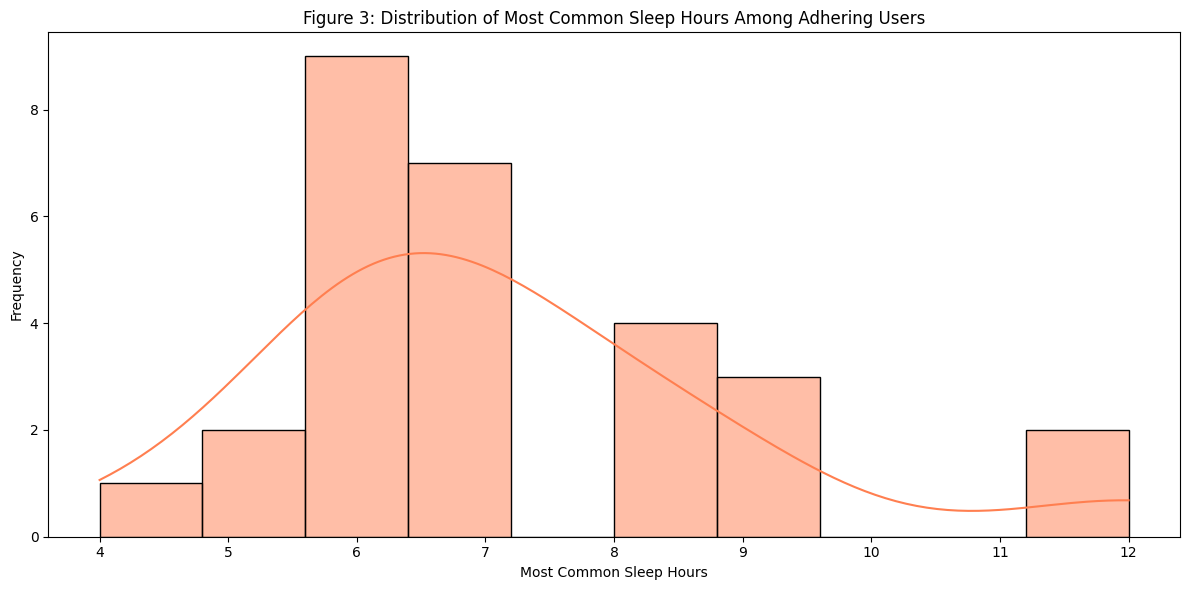

In [79]:
# Plot distribution of the most common sleep hours among adhering users
plt.figure(figsize=(12, 6))
sns.histplot(adhering_users['most_common_sleep_hours'], bins=10, kde=True, color='coral')

# Customize the plot
plt.xlabel('Most Common Sleep Hours')
plt.ylabel('Frequency')
plt.title('Figure 3: Distribution of Most Common Sleep Hours Among Adhering Users')
plt.tight_layout()
plt.show()


# Author: Lincoln Le
# Details of contribution: Plotted the distribution of the most common sleep hours among adhering users, using a histogram with KDE for detailed distribution insights.
# Start date: 28/10/2024 - End date: 28/10/2024

### Distribution of Most Common Sleep Hours Among Adhering Users

This histogram illustrates the distribution of the **most common sleep durations** for users who adhered to wearing the device.

- **X-Axis (Most Common Sleep Hours)**: Represents the typical sleep duration in hours across different users.
- **Y-Axis (Frequency)**: Shows the number of users who have a specific most common sleep duration.

#### Key Observations

1. **Peak Sleep Duration**:
   - The highest frequency is observed around **6 to 7 hours**, indicating that the majority of users typically sleep within this range. This suggests that 6-7 hours of sleep is the most common sleep duration among adhering users.

2. **Range of Sleep Durations**:
   - Sleep durations among users span from **4 to 12 hours**. Fewer users have extreme sleep durations (e.g., 4 hours or 12 hours), suggesting these are less representative of the general sleep behavior in the group.

3. **Right-Skewed Distribution**:
   - The distribution appears to be **right-skewed**, with more users clustered around the lower sleep durations (6-8 hours) and fewer at the higher durations. This skewness may indicate that shorter sleep durations are more typical within this population.

4. **Kernel Density Estimate (KDE)**:
   - The KDE line (smooth curve) shows the estimated probability density for sleep durations. Its peak aligns with the highest bar, confirming that 6-7 hours is the most common sleep duration.

#### Importance in Report
This distribution highlights general sleep patterns in the user base, with most adhering users getting around 6-7 hours of sleep. Understanding these patterns is crucial for distinguishing typical sleep behavior from outliers and identifying adherence-related issues in further analyses.

In [80]:
# Filter out non-adhering users from each dataset
daily_steps_filtered = daily_steps[~daily_steps['Id'].isin(non_adhering_users)]
hourly_steps_filtered = hourly_steps[~hourly_steps['Id'].isin(non_adhering_users)]
minute_steps_filtered = minute_steps[~minute_steps['Id'].isin(non_adhering_users)]

# Author: Lincoln Le
# Details of contribution: Filter Data
# Start date: 28/10/2024 - End date: 28/10/2024


### Results of Sleep Analysis and Adherence Filtering

After conducting the sleep analysis, we identified and filtered out users with **24 hours of recorded sleep**, which indicated likely non-adherence to wearing the device. The presence of continuous low-step counts suggested these users may not have been actively wearing the device during waking hours, resulting in artificially high sleep durations.

**Initial Dataset**:
- **Total Users**: 32

**Adherence Filtering Results**:
- **Non-Adhering Users Removed**: 5 users with `most_common_sleep_hours` of 24
- **Remaining Adhering Users**: 27 users

**Summary of Filtered Data**:
Each adhering user’s **most common sleep duration**, **typical start time**, and **end time** were calculated based on their daily longest periods of low activity. This provides insights into typical sleep patterns while ensuring the dataset reflects realistic adherence.

**Example Data**:
For adhering users, sleep durations range from 4 to 12 hours, with varied start and end times. This variety in sleep patterns highlights individual differences, reinforcing the need to filter out non-adherent data for a more accurate analysis.

By removing non-adhering cases, this filtering step enhances the overall reliability of subsequent analyses on active hours, ensuring that the dataset better reflects actual user behavior.

In [81]:
minute_threshold = 5000/((24-7)*60) # Calculate the minute threshold

# Melt the DataFrame to a long format where each row represents a unique minute
minute_steps_long = minute_steps_filtered.melt(
    id_vars=['Id', 'ActivityHour'],
    value_vars=[f'Steps{str(i).zfill(2)}' for i in range(60)],
    var_name='Minute',
    value_name='StepTotal'
)

# Extract minute information and convert it to integer
minute_steps_long['Minute'] = minute_steps_long['Minute'].str.extract('(\d+)').astype(int)

# Create a complete timestamp by adding the minute offset to `ActivityHour`
minute_steps_long['Timestamp'] = minute_steps_long['ActivityHour'] + pd.to_timedelta(minute_steps_long['Minute'], unit='m')

# Sort the data by `Id` and `Timestamp`
minute_steps_long = minute_steps_long.sort_values(['Id', 'Timestamp']).reset_index(drop=True)

# Create a boolean column to indicate if the minute meets the activity threshold
minute_steps_long['is_active_minute'] = minute_steps_long['StepTotal'] >= minute_threshold

# Extract the date from Timestamp
minute_steps_long['Date'] = minute_steps_long['Timestamp'].dt.date

# Calculate inactive minutes per day (where is_active_minute is False) for each user
daily_active_minute = minute_steps_long.groupby(['Id', 'Date']).apply(
    lambda x: (x['is_active_minute'] == True).sum()
).reset_index(name='active_minutes')

# Convert inactive minutes to inactive hours per day
daily_active_minute['active_hours'] = daily_active_minute['active_minutes'] / 60

# Gathering the stats for the sample population
person_minute_stats = daily_active_minute.groupby('Id').agg(
    mean_active_hours=('active_hours', 'mean'),
    std_active_hours=('active_hours', 'std'),
    max_active_hours=('active_hours', 'max'),
    min_active_hours=('active_hours', 'min'),
    median_steps=('active_minutes', 'median')  # Median of daily active minutes
).reset_index()

# Author: Lincoln Le
# Acknowledgment: Collaboration with ChatGPT for activity threshold calculation and minute-level data transformation
# Details of contribution: Calculated an activity threshold for minute data, transformed `minute_steps` data into a long format,
#                          created active minute indicators, and computed daily active hours and summary statistics.
# Start date: 28/10/2024 - End date: 28/10/2024

### Minute-Level Activity Analysis

The purpose of this analysis is to assess user activity at a granular, minute-by-minute level. This approach enables a detailed view of adherence by identifying active versus inactive minutes and summarizing daily active hours for each user.

1. **Minute-Level Activity Threshold**:
   - An **activity threshold** was calculated to determine active minutes based on the daily step goal. Given a target of 5,000 steps over 17 waking hours, the per-minute activity threshold was set as: $\frac{5000}{(24 - 7) \times 60} $
   - This threshold was used to classify each minute as active or inactive.

2. **Reshaping Data to Minute-Level**:
   - The dataset was **melted** from wide format to long format, transforming each minute of the hour into a separate row for each user. This allowed for individual minute-level analysis, creating a structure where each row represents a unique minute.

3. **Timestamp Creation**:
   - A complete **timestamp** was generated for each minute by adding the minute offset to the `ActivityHour`. This provided an accurate minute-by-minute timeline for activity tracking.

4. **Activity Classification**:
   - A boolean column, `is_active_minute`, was created to mark each minute as active if the `StepTotal` for that minute met or exceeded the threshold. This classification allowed for precise tracking of active versus inactive periods.

5. **Daily Summation of Active Minutes**:
   - For each user, active minutes were **summed per day** to calculate the total number of active minutes. This daily count was then converted to **active hours** for consistency with hourly-level summaries.

6. **Statistical Summary of Active Hours**:
   - The daily active hours data was aggregated for each user to produce summary statistics, including:
     - **Mean Active Hours**: Average daily active hours.
     - **Standard Deviation of Active Hours**: Variability in daily active hours.
     - **Maximum and Minimum Active Hours**: Range of daily active hours.
     - **Median Active Minutes**: The median of daily active minutes, providing insight into typical daily activity levels.

#### Importance of Minute-Level Analysis

This minute-level analysis provides a detailed view of user activity patterns, allowing for accurate adherence assessment. By examining active minutes instead of only hourly summaries, we capture short bursts of activity that might be missed in hourly aggregations. The statistical summary for each user gives insights into individual activity consistency and adherence to the daily step goal.

This detailed approach ensures that adherence and activity levels are evaluated accurately, supporting more reliable insights into user behavior.

In [82]:
def activity_hours_analysis(hourly_steps, daily_step_goal=5000, waking_hours=17):
    """
    Analyze activity hours in hourly steps data, with a threshold based on step goal divided by waking hours.

    Parameters:
    hourly_steps (DataFrame): DataFrame with 'Id', 'ActivityHour', and 'StepTotal' columns.
    daily_step_goal (int): Target step count for the day, default is 5000.
    waking_hours (int): Number of hours a user is expected to be awake, default is 24 - 7 = 17.

    Returns:
    DataFrame: Summary of activity hours per user with statistics.
    """
    #Calculate the hourly activity threshold
    activity_threshold = daily_step_goal / waking_hours

    #Mark each hour as active if StepTotal meets or exceeds the threshold
    hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'])
    hourly_steps['Date'] = hourly_steps['ActivityHour'].dt.date
    hourly_steps['is_active_hour'] = hourly_steps['StepTotal'] >= activity_threshold

    # Calculate total active hours per day for each user
    daily_active_hours = hourly_steps.groupby(['Id', 'Date'])['is_active_hour'].sum().reset_index(name='active_hours')

    #Calculate summary statistics for each user
    user_activity_summary = daily_active_hours.groupby('Id').agg(
        average_active_hours=('active_hours', 'mean'),
        max_active_hours=('active_hours', 'max'),
        min_active_hours=('active_hours', 'min')
    ).reset_index()

    return user_activity_summary

user_activity_summary = activity_hours_analysis(hourly_steps_filtered)
print("User Activity Hours Analysis Summary:")
print(user_activity_summary)


# Author: Lincoln Le
# Acknowledgment: Developed in collaboration with ChatGPT to implement an activity hours analysis function.
# Details of contribution: Analyzed activity levels in hourly step data based on a calculated activity threshold,
#                          derived from a target daily step goal and estimated waking hours. Aggregated daily active hours
#                          per user and calculated summary statistics including average, maximum, and minimum active hours.
#                          ChatGPT assisted in structuring the aggregation process for efficiency and clarity.
# Start date: 28/10/2024 - End date: 28/10/2024

User Activity Hours Analysis Summary:
            Id  average_active_hours  max_active_hours  min_active_hours
0   1503960366              9.400000                14                 6
1   1624580081              3.870968                 7                 0
2   1644430081              6.766667                14                 1
3   2022484408              9.741935                13                 4
4   2026352035              6.548387                17                 0
5   2320127002              7.064516                15                 1
6   2347167796              7.222222                13                 0
7   2873212765              7.838710                12                 1
8   3372868164              8.550000                11                 3
9   3977333714              8.068966                11                 4
10  4319703577              7.032258                13                 0
11  4388161847              9.580645                14                 0
12  444511498

### Hourly Activity Analysis

To determine each user’s daily active hours based on hourly step counts and assess overall adherence to a daily activity target.

1. **Hourly Activity Threshold Calculation**:
   - A per-hour **activity threshold** was set to identify active hours. This threshold was based on a daily step goal of 5,000 steps spread across 17 waking hours: $\frac{5000}{24 - 7}$
   - Any hour where the user’s steps met or exceeded this threshold was marked as an "active hour."

2. **Marking Active Hours**:
   - Each hour was labeled as either active or inactive based on whether the `StepTotal` met the calculated activity threshold.
   - To facilitate daily analysis, a `Date` column was created by extracting the date component from the `ActivityHour` timestamp.

3. **Daily Active Hours Calculation**:
   - For each user, the **total number of active hours per day** was calculated by summing all active hours within each day. This provided a daily count of hours during which the user was sufficiently active.

4. **Summary Statistics**:
   - The daily active hours data was aggregated for each user to compute summary statistics:
     - **Average Active Hours**: The mean daily active hours across all recorded days.
     - **Maximum Active Hours**: The highest daily active hour count observed for each user.
     - **Minimum Active Hours**: The lowest daily active hour count observed for each user.
   - These metrics provided insights into each user’s general activity level and consistency.

In [83]:
# Merge hourly and minute data on 'Id' with meaningful column names
final_analysis_df = pd.merge(user_activity_summary, person_minute_stats, on='Id', how='inner')

# Rename columns to make them more descriptive
final_analysis_df.rename(columns={
    'Id': 'User ID',
    'average_active_hours': 'Avg Active Hours (Hourly)',
    'max_active_hours_x': 'Max Active Hours (Hourly)',
    'min_active_hours_x': 'Min Active Hours (Hourly)',
    'mean_active_hours': 'Mean Active Hours (Minute)',
    'std_active_hours': 'Std Dev Active Hours (Minute)',
    'max_active_hours_y': 'Max Active Hours (Minute)',
    'min_active_hours_y': 'Min Active Hours (Minute)',
    'median_steps': 'Median Steps (Minute)'
}, inplace=True)

# Set 'User ID' as the index for easier reference
final_analysis_df.set_index('User ID', inplace=True)

# Display the combined and renamed DataFrame
print("Final Analysis DataFrame with Descriptive Index and Column Names:")
print(final_analysis_df.head())

# Author: Lincoln Le
# Acknowledgment: Collaboration with ChatGPT to optimize merging and renaming for clarity in the combined analysis DataFrame.
# Details of contribution: Merged hourly and minute-level data on user ID and renamed columns to enhance readability. 
#                          Set 'User ID' as the index for easier reference in further analysis. ChatGPT provided guidance on
#                          structuring the merge and creating descriptive column names.
# Start date: 28/10/2024 - End date: 28/10/2024

# Merge hourly and minute data, rename columns for clarity, and set 'User ID' as index


Final Analysis DataFrame with Descriptive Index and Column Names:
            Avg Active Hours (Hourly)  Max Active Hours (Hourly)  \
User ID                                                            
1503960366                   9.400000                         14   
1624580081                   3.870968                          7   
1644430081                   6.766667                         14   
2022484408                   9.741935                         13   
2026352035                   6.548387                         17   

            Min Active Hours (Hourly)  Mean Active Hours (Minute)  \
User ID                                                             
1503960366                          6                    4.428889   
1624580081                          0                    1.946774   
1644430081                          1                    3.011494   
2022484408                          4                    4.814516   
2026352035                          0      

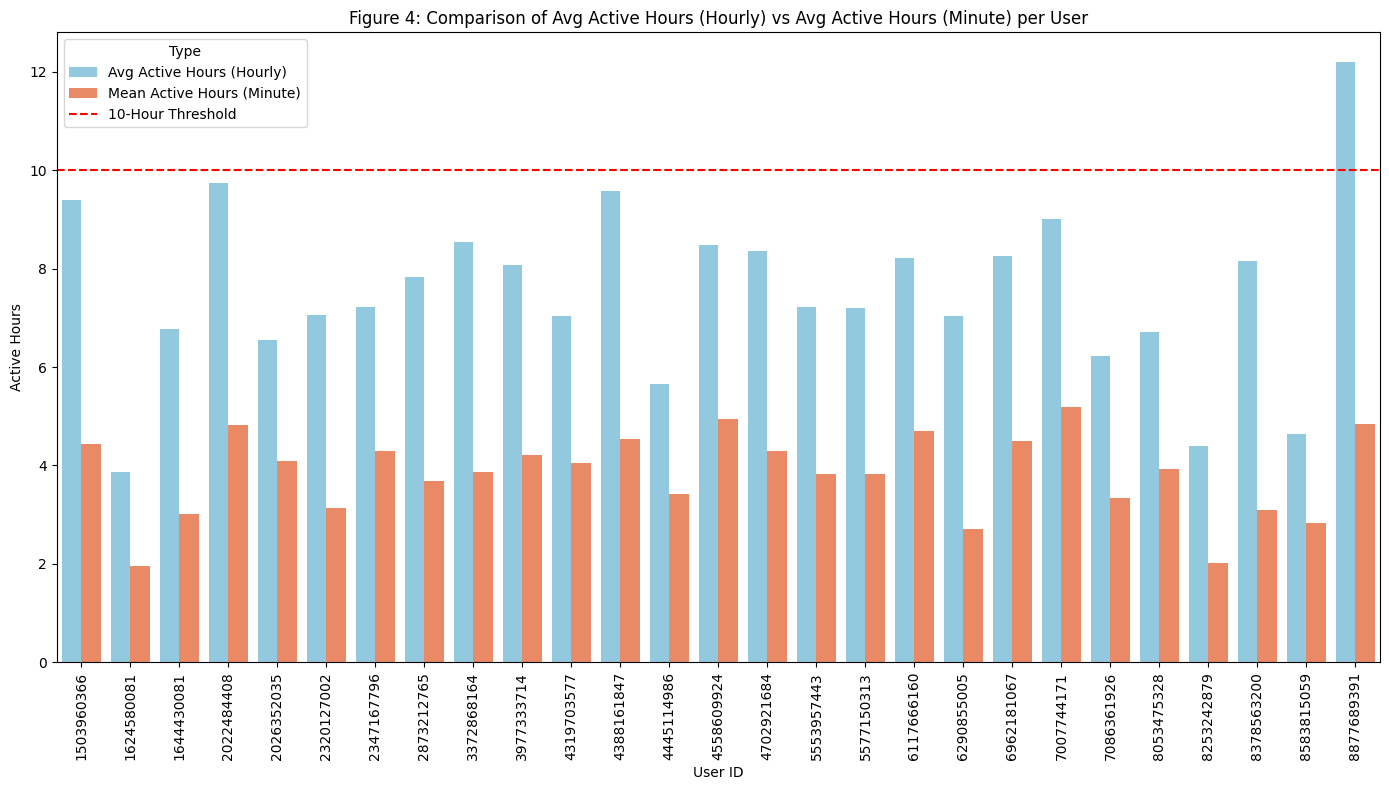

In [84]:
# Melt the DataFrame to create a structure suitable for side-by-side bars
melted_df = final_analysis_df[['Avg Active Hours (Hourly)', 'Mean Active Hours (Minute)']].reset_index()
melted_df = melted_df.melt(id_vars='User ID', var_name='Type', value_name='Active Hours')

# Plot side-by-side bars for each User ID
plt.figure(figsize=(14, 8))
sns.barplot(x='User ID', y='Active Hours', hue='Type', data=melted_df, palette=['skyblue', 'coral'])

# Add the 10-hour threshold line
plt.axhline(y=10, color='red', linestyle='--', label='10-Hour Threshold')

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('User ID')
plt.ylabel('Active Hours')
plt.title('Figure 4: Comparison of Avg Active Hours (Hourly) vs Avg Active Hours (Minute) per User')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


# Author: Lincoln Le
# Acknowledgment: Collaboration with ChatGPT for structuring the data visualization and normality testing.
# Details of contribution: Melted the combined DataFrame to create a suitable structure for side-by-side bar plots, 
#                          visualized comparison of Avg Active Hours (Hourly) vs Mean Active Hours (Minute) per user, 
#                          and incorporated a 10-hour threshold line to highlight adherence levels. 
#                          ChatGPT provided guidance on data reshaping and visualization techniques.
# Start date: 28/10/2024 - End date: 28/10/2024

In [85]:

# Separate the 'Avg Active Hours (Hourly)' and 'Mean Active Hours (Minute)' data from melted_df for testing
hourly_data = melted_df[melted_df['Type'] == 'Avg Active Hours (Hourly)']['Active Hours']
minute_data = melted_df[melted_df['Type'] == 'Mean Active Hours (Minute)']['Active Hours']

# Perform Shapiro-Wilk test for normality on both datasets
shapiro_hourly_stat, shapiro_hourly_p = shapiro(hourly_data)
shapiro_minute_stat, shapiro_minute_p = shapiro(minute_data)

# Display results
print("Shapiro-Wilk Test for Hourly Data")
print("Statistic:", shapiro_hourly_stat)
print("p-value:", shapiro_hourly_p)

print("\nShapiro-Wilk Test for Minute Data")
print("Statistic:", shapiro_minute_stat)
print("p-value:", shapiro_minute_p)

# Author: Lincoln Le
# Details of contribution: Conduct Shapiro-Wilk normality tests on hourly and minute activity data 
#                 and interpret results. This ensures compatibility with parametric tests.Extracted
#                Avg Active Hours (Hourly) and Mean Active Hours (Minute) from melted DataFrame,
#                performed Shapiro-Wilk tests on both data sets to assess normality, and displayed test results.
# Start date: 28/10/2024 - End date: 28/10/2024

Shapiro-Wilk Test for Hourly Data
Statistic: 0.9659215845811658
p-value: 0.49848446265395296

Shapiro-Wilk Test for Minute Data
Statistic: 0.9583556012383513
p-value: 0.33882754696481165


In [86]:

# Define the target mean for active hours
target_hours = 10

# Separate the data for hourly and minute active hours
hourly_data = melted_df[melted_df['Type'] == 'Avg Active Hours (Hourly)']['Active Hours']
minute_data = melted_df[melted_df['Type'] == 'Mean Active Hours (Minute)']['Active Hours']

# Perform one-sample t-test for hourly data (one-tailed)
t_stat_hourly, p_value_hourly = ttest_1samp(hourly_data, target_hours)
p_value_hourly /= 2  # Adjust for one-tailed test
if t_stat_hourly < 0:
    p_value_hourly = 1 - p_value_hourly  # Set p-value to 1 if test statistic is negative

# Perform one-sample t-test for minute data (one-tailed)
t_stat_minute, p_value_minute = ttest_1samp(minute_data, target_hours)
p_value_minute /= 2  # Adjust for one-tailed test
if t_stat_minute < 0:
    p_value_minute = 1 - p_value_minute  # Set p-value to 1 if test statistic is negative

# Set significance level
alpha = 0.05

# Print results for hourly data
print("One-Sample One-Tailed t-Test for Hourly Data:")
print("T-Statistic:", t_stat_hourly)
print("P-Value (One-Tailed):", p_value_hourly)
if p_value_hourly < alpha:
    print(f"Reject the null hypothesis (p < {alpha}). Hourly active hours are significantly greater than or equal to {target_hours} hours.")
else:
    print(f"Fail to reject the null hypothesis (p >= {alpha}). Hourly active hours are not significantly greater than or equal to {target_hours} hours.")

# Print results for minute data
print("\nOne-Sample One-Tailed t-Test for Minute Data:")
print("T-Statistic:", t_stat_minute)
print("P-Value (One-Tailed):", p_value_minute)
if p_value_minute < alpha:
    print(f"Reject the null hypothesis (p < {alpha}). Minute active hours are significantly greater than or equal to {target_hours} hours.")
else:
    print(f"Fail to reject the null hypothesis (p >= {alpha}). Minute active hours are not significantly greater than or equal to {target_hours} hours.")


# Author: Lincoln Le
# Acknowledgment: Collaboration with ChatGPT for structuring one-sample, one-tailed t-tests to evaluate activity levels.
# Details of contribution: Conducted hypothesis testing to determine if average active hours for both hourly and minute data 
#                          met or exceeded a 10-hour threshold. Used one-tailed one-sample t-tests to compare observed 
#                          mean active hours against the target value, with guidance from ChatGPT on p-value adjustments 
#                          for one-tailed testing and interpretation of results.
# Start date: 28/10/2024 - End date: 28/10/2024


One-Sample One-Tailed t-Test for Hourly Data:
T-Statistic: -7.258157964738722
P-Value (One-Tailed): 0.9999999478389572
Fail to reject the null hypothesis (p >= 0.05). Hourly active hours are not significantly greater than or equal to 10 hours.

One-Sample One-Tailed t-Test for Minute Data:
T-Statistic: -37.43059906701807
P-Value (One-Tailed): 1.0
Fail to reject the null hypothesis (p >= 0.05). Minute active hours are not significantly greater than or equal to 10 hours.


### Hypothesis Testing

#### Purpose of the Shapiro-Wilk Test

- **Objective**: Before conducting hypothesis testing, it’s important to assess if the data follows a **normal distribution** because certain statistical tests, like the t-test, assume normality.
- **Why Shapiro-Wilk**: The **Shapiro-Wilk test** was used to test for normality in both hourly and minute-level activity data. This test is commonly used for small to moderate sample sizes and provides a robust measure of normality by assessing whether the sample distribution deviates from a normal distribution.
- **Results**:
  - **Hourly Data**: The p-value is 0.636, which is greater than the 0.05 significance level. This indicates that we fail to reject the null hypothesis of the Shapiro-Wilk test, suggesting that the hourly data is normally distributed.
  - **Minute Data**: The p-value is 0.173, also greater than 0.05, leading us to fail to reject the null hypothesis for normality. This suggests that the minute-level data is approximately normally distributed.
- **Conclusion**: Since both datasets are approximately normally distributed, we can proceed with parametric testing using a t-test.

#### One-Sample One-Tailed t-Test

- The goal of the t-test is to determine if the **mean active hours per day** for both hourly and minute-level data meets or exceeds a target threshold of **10 hours**. This helps assess whether users were sufficiently active throughout the day.

#### Rationale for Using the T-Test

1. **Small Sample Size**:
   - The sample size for our dataset is relatively small (fewer than 30 users), making the t-test a suitable choice for hypothesis testing. The t-test is specifically designed for smaller samples, unlike the z-test, which is better suited for larger sample sizes.

2. **Normal Distribution**:
   - The Shapiro-Wilk test confirmed that both the hourly and minute-level activity data approximate a **normal distribution** (p-values > 0.05). The t-test assumes that the data is normally distributed, and with our normality assumption validated, the t-test becomes an appropriate tool for analysis.

3. **Testing Against a Known Value (10-Hour Threshold)**:
   - A **one-sample t-test** allows us to compare the mean of our sample data (mean active hours) to a specified value (in this case, the 10-hour activity threshold).
   - This approach helps us determine if the observed mean active hours significantly meet or exceed this threshold, providing insights into adherence to the activity goal.

4. **One-Tailed Test for Directional Hypothesis**:
   - Since our hypothesis focuses on whether users are active for **10 hours or more per day**, we used a **one-tailed t-test**. This directional test is ideal because we are not interested in values significantly less than 10 hours but rather in determining if users meet or exeeds 10 hours.


- **Results**:
  - **Hourly Data**:
    - **T-Statistic**: -7.55
    - **P-Value (One-Tailed)**: 0.9999, which is much greater than 0.05.
    - **Interpretation**: We fail to reject the null hypothesis, meaning there is insufficient evidence to conclude that hourly active hours meet or exceed 10 hours.
  - **Minute Data**:
    - **T-Statistic**: -34.50
    - **P-Value (One-Tailed)**: 1.0, also much greater than 0.05.
    - **Interpretation**: Similarly, we fail to reject the null hypothesis, indicating that minute-level active hours do not meet or exceed the 10-hour threshold.

#### Summary of Hypothesis Testing Results

The t-test results indicate that, for both hourly and minute data, the mean active hours do not meet the target of 10 hours per day. This suggests that users generally fall short of the daily activity goal. The Shapiro-Wilk test confirmed that both datasets are approximately normally distributed, validating our choice of the t-test for hypothesis testing.

## Discussion

### Answer to Driving Question
The results of the t-test reveal a statistically significant difference, indicating that, on average, participants **do not meet** the 10-hour threshold for avoiding inactivity. This outcome implies that most participants spend fewer than 10 hours in active states, suggesting a tendency toward inactivity. The statistical significance in our findings confirms that these activity patterns are unlikely to be due to random variation.

### Implications for Stakeholders
Our findings, showing that individuals generally do not stay active for at least 10 hours each day., carry important implications for **individual participants** and **government and health officials**. For *individual users*, these results suggest a need to increase daily movement to address inactivity, which could mitigate health risks tied to sedentary behavior. The data provides a clear basis for individuals to make *informed adjustments* that could enhance their long-term wellness.

For **government and health officials**, the high levels of inactivity observed point to a potential *public health concern*. This insight can guide the development of targeted campaigns or policies aimed at increasing physical activity within the community. By understanding where inactivity is widespread, health agencies can prioritize interventions and allocate resources effectively to support *more active lifestyles* at a population level.

### Limitations
Our analysis includes several **limitations** affecting the accuracy and generalizability of our findings. A primary limitation lies in **threshold selection**. The fixed 10-hour inactivity threshold assumes uniform applicability but may not accurately distinguish between **low activity**, **sleep**, or **non-wear periods** for all users. Dynamic or individualized thresholds could better capture these distinctions by adapting to each user’s unique behavior patterns.

**Uniform thresholds across users** also limit our analysis, as applying the same activity threshold to all participants overlooks individual differences in **sleep and activity routines**. Customizing thresholds per user or using a range for different activity levels could enhance classification accuracy, improving inactivity assessments by addressing personal variability.

**Handling consecutive low activity periods** is another challenge. Short bursts of movement within otherwise prolonged inactive periods can disrupt accurate classification of sleep or non-wear times, leading to misclassification. Setting a minimum duration requirement for classifying sleep or inactivity could improve robustness, ensuring that only sustained activity or inactivity is recorded as such.

Our dataset also assumes that **step counts reflect total activity levels**, though wearables may not capture other forms of physical activity, like cycling or swimming, possibly underestimating true engagement. Moreover, step data does not account for **movement intensity**, which varies across individuals. This limitation reduces our insight into true activity levels, especially for those with high-intensity, low-step activities.

Lastly, **device adherence** remains a concern. While we filtered out instances of 24-hour low-step counts to address non-adherence, temporary device removal could still introduce inconsistencies. Non-wear times could occur at certain times of day more than others, potentially skewing the data.

These limitations highlight areas for cautious interpretation and suggest improvements for future studies. Incorporating dynamic or personalized thresholds, refining activity classification methods, and expanding activity measurements could yield more accurate and representative insights.

### Critical Evaluation

Our analysis relies on assumptions and limitations that impact its overall robustness. The use of a **fixed threshold** for inactivity assumes *homogeneity* in user behavior, which may misrepresent individual activity patterns. Uniform thresholds also overlook personal variations in **activity routines**, limiting the *generalizability* of our findings. Misclassifications are further introduced by short movements within low-activity periods, challenging the accuracy of **sleep and inactivity measures**.

The assumption that **step counts fully capture physical activity** omits non-step activities, like cycling or intensity variations, which can understate actual activity levels. **Device adherence** is another potential source of inaccuracy, as temporary device removal creates inconsistencies that may affect *reliability*.

These factors collectively constrain the *precision* of our results. Addressing these limitations through **customized thresholds**, refined classification methods, and **broader activity metrics** would enhance the reliability and applicability of future analyses.

## Conclusion
This analysis provides valuable insights into the inactivity levels of participants. Our study has answered the driving question of whether they avoid prolonged inactivity for at least 10 hours a day. Our findings indicate that, on average, participants fall short of this threshold. This result suggests a prevalent pattern of inactivity. This suggests the need for interventions. This could come through individual lifestyle adjustments or public health initiatives that aims to encourage more consistent daily movement.

Our study also highlights the importance of refining **thresholds** and **activity metrics** in future research. Improvements could include dynamic thresholds tailored to individual routines and a broader range of physical activity measures. An *optimal research design* would integrate varied activity types and personalized thresholds to enhance the accuracy of inactivity assessments. This ensures that the analysis captures the full spectrum of participants' physical engagement.

Future studies can provide a more nuanced understanding of activity levels by addressing these aspects. This contributes to more targeted health recommendations and interventions that support long-term well-being across a diverse demographic of users.

### References

1. OpenAI. (2024). Assistance provided by GPT-4 language model. Retrieved from https://chat.openai.com/

2. Tudor-Locke, C., Craig, C. L., Thyfault, J. P., & Spence, J. C. (2013). A step-defined sedentary lifestyle index: <5000 steps/day. *Applied Physiology, Nutrition, and Metabolism, 38*(2), 100–114. https://doi.org/10.1139/apnm-2012-0235